# **Data Visualization of 2019-nCov (Novel Corona Virus)**
![2019-nCoV](https://news.images.itv.com/image/file/2114540/stream_img.jpg)

---

#### *Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.*



### Dataset used in this notebook was obtained from [kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset).

#### First let's install *geopandas*, A library used for plotting spatial graphs

In [1]:
!pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 10.1MB 43.7MB/s 
     |████████████████████████████████| 11.8MB 36.5MB/s 


#### **Importing all the necessary libraries.**

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import geopandas as gpd
import numpy as np
import seaborn as sns

#### **Downloading Dataset**

In [3]:
!wget https://raw.githubusercontent.com/iam-abbas/Coronavirus-Data-Visualization/master/Data/2019-nCov_Data.csv
!wget https://github.com/iam-abbas/Coronavirus-Data-Visualization/raw/master/Data/Countries.zip
!unzip Countries

--2020-02-02 09:59:04--  https://raw.githubusercontent.com/iam-abbas/Coronavirus-Data-Visualization/master/Data/2019-nCov_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25666 (25K) [text/plain]
Saving to: ‘2019-nCov_Data.csv’

2019-nCov_Data.csv  100%[===================>]  25.06K  --.-KB/s    in 0.01s   

2020-02-02 09:59:05 (1.88 MB/s) - ‘2019-nCov_Data.csv’ saved [25666/25666]

--2020-02-02 09:59:06--  https://github.com/iam-abbas/Coronavirus-Data-Visualization/raw/master/Data/Countries.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/iam-abbas/Coronavirus-Data-Visualization/master/Da

#### **Preparing the Dataset**

##### I am going to use **```data```** as a primary data variable and derive other data-frames from it.

##### We also get rid of serial number and change the date fromat

In [4]:
data = pd.read_csv('2019-nCov_Data.csv')
data['Last Update'] = data['Last Update'].apply(pd.to_datetime)
data['Country'] = data['Country'].replace('Mainland China', 'China')
data.drop(['Sno'],axis=1,inplace=True)
data.head()

,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0
1,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0
2,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0
3,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0
4,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0


##### The First Data Frame is of Confirmed cases. I grouped the entities by ```'Countries'``` and added the number of confirmed cases


In [5]:
cases = pd.DataFrame(data.groupby('Country')['Confirmed'].sum())
cases['Country'] = cases.index
global_cases = cases[['Country', 'Confirmed']]
global_cases[['Confirmed']]

,Confirmed
Country,
Australia,43.0
Brazil,0.0
Cambodia,5.0
Canada,13.0
China,45756.0
Finland,3.0
France,31.0
Germany,20.0
Hong Kong,68.0


##### Second Data Frame is of Death and Recovered cases. nCoV had almost equal number of deaths and recovered cases. The Graph below shows the Growth of Coronavirus

Text(0.5, 0, 'Date')

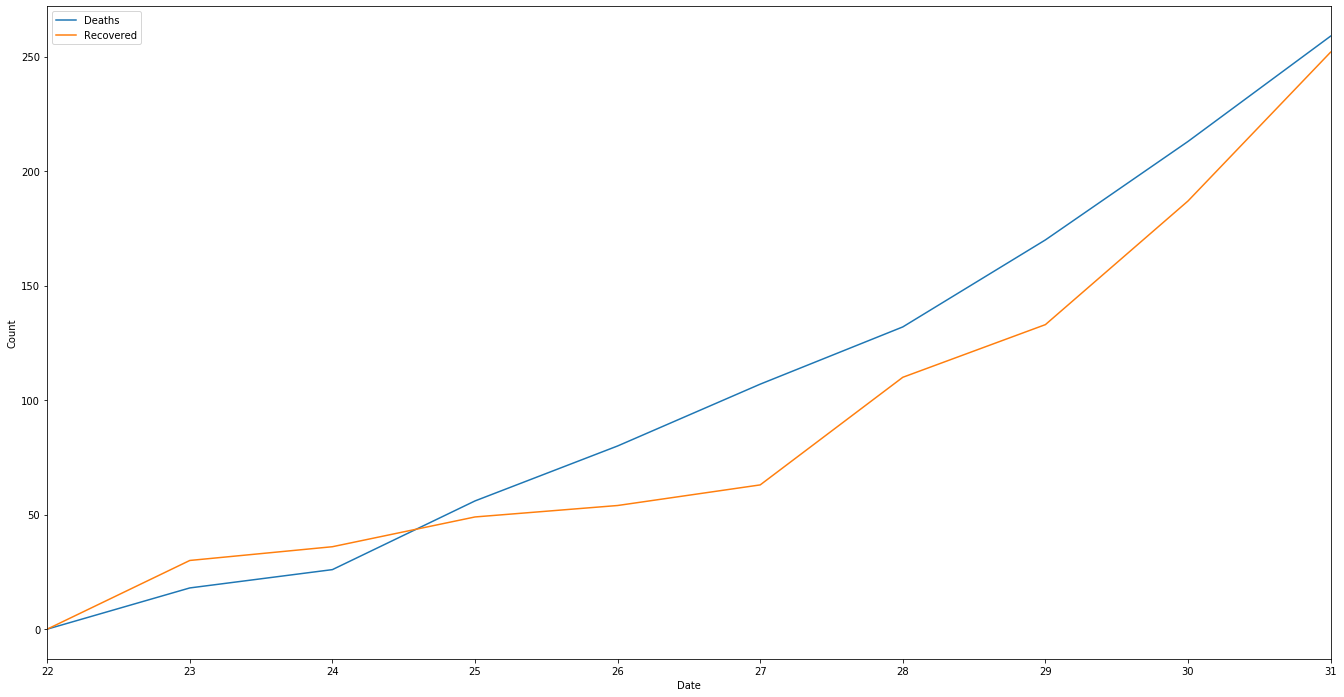

In [6]:
data_by_date = data
data_by_date['Day'] = data_by_date['Last Update'].apply(lambda x:x.day)
ax = data_by_date[['Day', 'Deaths', 'Recovered']].groupby(['Day']).sum().plot(figsize= (23, 12))
ax.set_ylabel("Count")
ax.set_xlabel("Date")

#### **Loading the World Map Dataset**

In [7]:
world = gpd.read_file('Countries/Countries.shp')
world.head()

,OBJECTID,CNTRY_NAME,geometry
0,1,Aruba,"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,2,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,3,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,4,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,5,Azerbaijan,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41..."


##### First we get rid of Antarctica then we join our very first Datat Frame with the World Dataset under a common identity of Country Name

In [8]:
world = world[world['CNTRY_NAME'] != 'Antarctica']
world_map = world.set_index('CNTRY_NAME').join(global_cases.set_index('Country'))
world_map['Confirmed'] = world_map['Confirmed'].fillna(0)
world_map.head()

,OBJECTID,geometry,Confirmed
CNTRY_NAME,,,
Aruba,1,"POLYGON ((-69.88223 12.41111, -69.94695 12.436...",0.0
Antigua and Barbuda,2,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ...",0.0
Afghanistan,3,"POLYGON ((61.27656 35.60725, 61.29638 35.62853...",0.0
Algeria,4,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",0.0
Azerbaijan,5,"MULTIPOLYGON (((45.02583 41.03055, 45.00999 41...",0.0


##### The confirmed cases in China were over 45,000. So I changed the max value to 250 to have a visual difference in the graph below

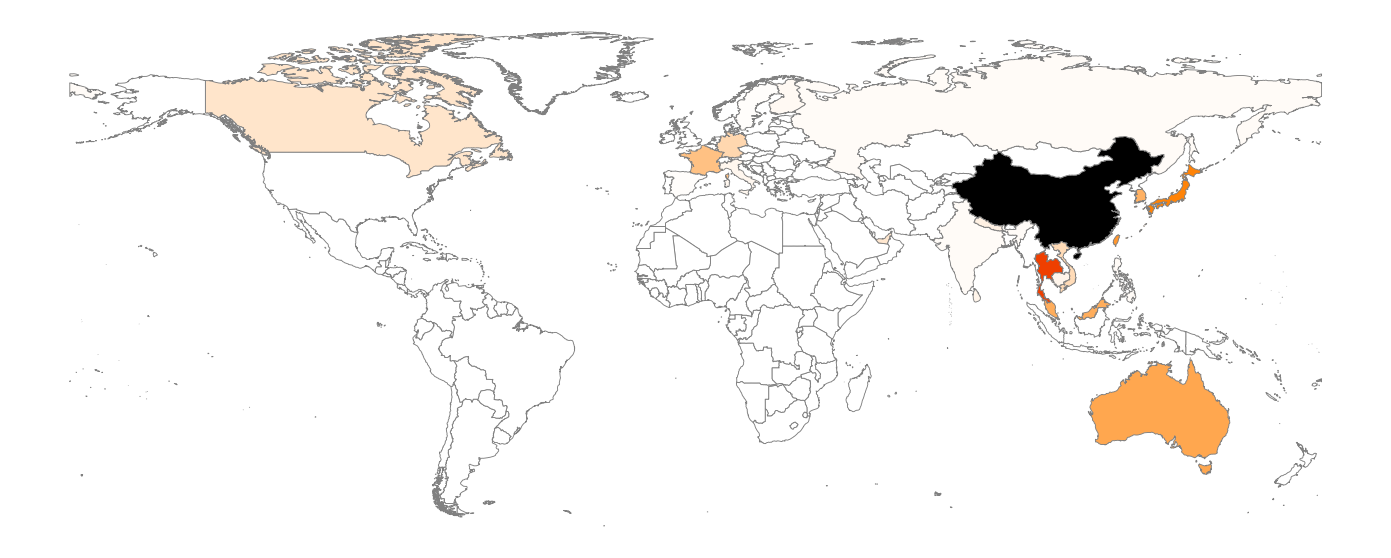

In [9]:
fig, ax = plt.subplots(1, figsize=(28, 10))
ax.axis('off')
maxVal = 250.0
world_map['Confirmed'] = world_map['Confirmed'].where(world_map['Confirmed'] <= maxVal, maxVal)
world_map.plot(column="Confirmed", cmap='gist_heat_r', ax=ax, linewidth=0.9, edgecolor='0.5')


##### China is the Primary Country to get affected. I grouped the Data by Date and Seperated China's data from the entire dataset and added a bar plot

Text(0.5, 0, 'Total Confirmed Cases')

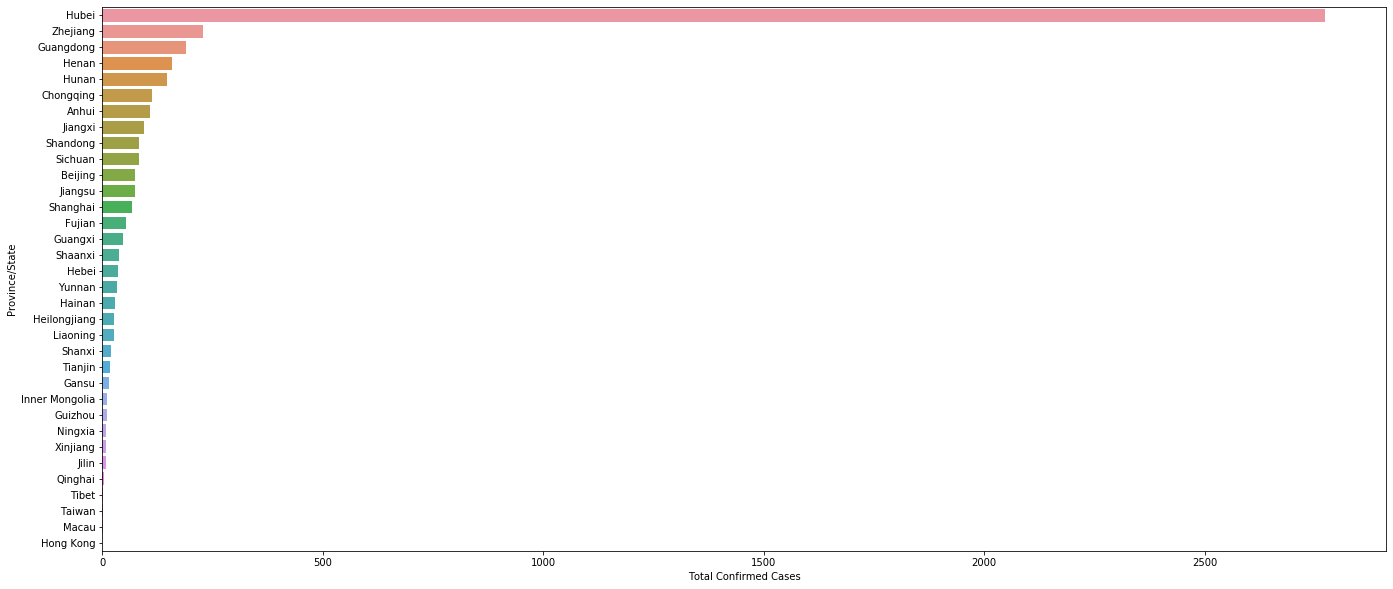

In [10]:
china = data[data['Country']=='China']
plt.rcParams["figure.figsize"] = (23,10)
nums = china.groupby(["Province/State"])['Confirmed'].aggregate(sum).reset_index().sort_values('Confirmed', ascending= False)
ax = sns.barplot(x="Confirmed", y="Province/State", order = nums['Province/State'], data=china, ci=None) 
ax.set_xlabel("Total Confirmed Cases")


#### The Third Dataframe is of Chinese Death, Recovered and Infected comparision

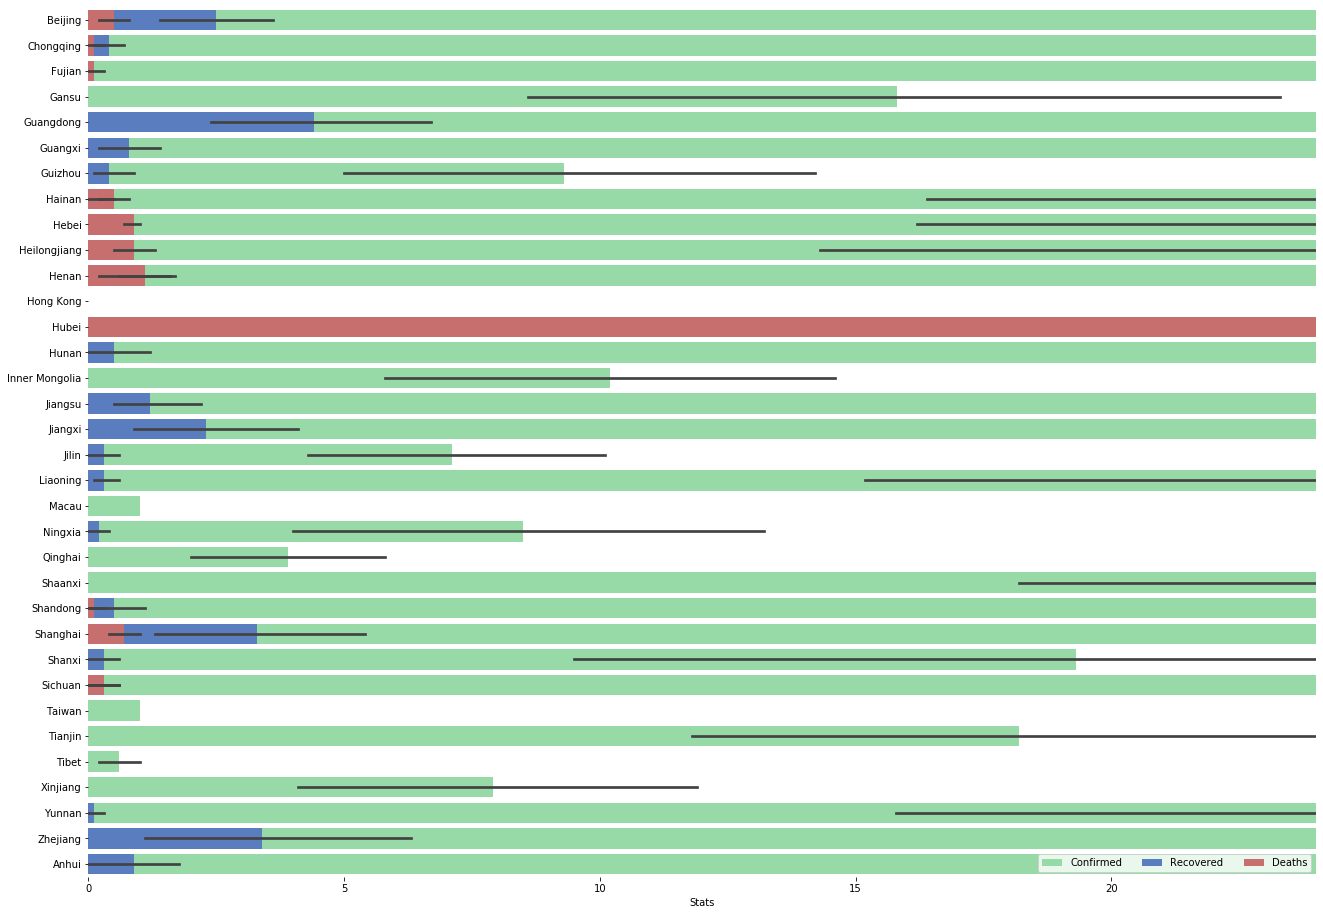

In [11]:
f, ax = plt.subplots(figsize=(22, 16))

sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province/State", data=china[1:],label="Confirmed", color="g")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province/State", data=china[1:],label="Recovered", color="b")
sns.barplot(x="Deaths", y="Province/State", data=china[1:],label="Deaths", color="r")

ax.legend(ncol=3, loc="lower right")
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Stats")
sns.despine(left=True, bottom=True)